<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_ML_con_Python/blob/master/Regressione_NL_Regression_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT GENERAL LIBRARIES

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 

# IMPORT DATA FROM EXTERNAL SOURCE

INPUT DATASET
   Superficie  prezzo
0          60  111261
1          70  168322
2         140  141126
3         150   94528
4          55  179671
Dimensione: (121, 2) 

Dimensione features vectors (121,) 
Dimensione output (121,)


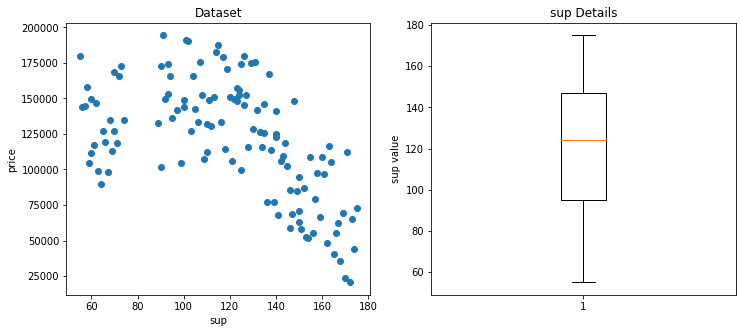

In [3]:

path='https://raw.githubusercontent.com/MatteoGandetto/Corso_ML_con_Python/master/Regressione_NL_Decision_Tree_IN.csv'
INPUT_df=pd.read_csv(path)

print('INPUT DATASET')
print(INPUT_df.head())
print('Dimensione:',INPUT_df.shape,'\n')

#remove all NaN
# 0 -> rows
# 1 -> columns
INPUT_df=INPUT_df.dropna(1,'all')
INPUT_df=INPUT_df.dropna(0,'all')


#convert to NumPy array
np_IN=np.array(INPUT_df)
np_IN_X=np_IN[:,0]
np_IN_y=np_IN[:,1]
print('Dimensione features vectors',np_IN_X.shape,'\nDimensione output',np_IN_y.shape)

#plot data
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,5)

axs[0].scatter(np_IN_X, np_IN_y)
axs[0].set_xlabel('sup')
axs[0].set_ylabel('price')
axs[0].set_title('Dataset')

axs[1].boxplot(np_IN_X)
axs[1].set_ylabel('sup value')
axs[1].set_title('sup Details')
fig.show()

# LIBRARIES FOR MACHINE LEARNING

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# DATA PRE-PROCESSING

In [0]:
# split dataset in training part and test part
# if train_size and test_size are not defined,the train_size=0.75 and test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(np_IN_X,np_IN_y,test_size=0.25)


# SIMPLE LINEAR SOLUTION

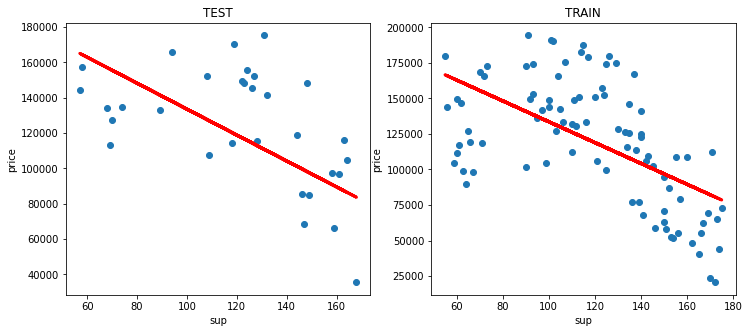

In [7]:
#reshape features to be used with LinearRegression's methods
X_train_r=np.reshape(X_train,(-1, 1))
X_test_r=np.reshape(X_test,(-1, 1))
X_all=np.reshape(np_IN_X,(-1,1))

#train the linear regressor
reg = LinearRegression().fit(X_train_r, y_train)

#y_pred is a linear prediction of X_test
y_pred_test=reg.predict(X_test_r)
y_pred_train=reg.predict(X_train_r)

#show the solution
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,5)


axs[0].set_xlabel('sup')
axs[0].set_ylabel('price')
axs[0].set_title('TEST')
axs[0].scatter(X_test,y_test)
axs[0].plot(X_test,y_pred_test,c='red',linewidth=3)

axs[1].set_title('TRAIN')
axs[1].set_xlabel('sup')
axs[1].set_ylabel('price')
axs[1].scatter(X_train,y_train)
axs[1].plot(X_train,y_pred_train,c='red',linewidth=3)

fig.show()

# POLYNOMIAL SOLUTION

TEST
R^2= 0.36076186247969433 
MSE= 685398975.852865 

TRAIN
R^2= 0.5889356349954367 
MSE= 765032666.330802 



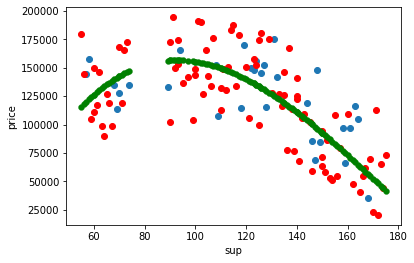

In [9]:
# Import methods
from sklearn.preprocessing import PolynomialFeatures

#modify features to polynomial aspect
poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(X_train_r)
X_poly_test = poly_reg.transform(X_test_r)
X_poly_all = poly_reg.transform(X_all)


#train the Linear Regression with trandformed 'polinomially' features
pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

#y_pred_xxx is a prediction of X_poly_xxx
y_pred_test=pol_reg.predict(X_poly_test)
y_pred_train=pol_reg.predict(X_poly_train)
y_pred_all=pol_reg.predict(X_poly_all)

#evaluate the model by using R=1-RSE and MSE
R2=pol_reg.score(X_poly_test,y_test)
MSE = mean_squared_error( y_test,y_pred_test)
R2_train=pol_reg.score(X_poly_train,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
print ('TEST\nR^2=',R2,'\nMSE= %f \n' % MSE)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)


#plot the solution
fig, axs = plt.subplots(1,1)

axs.set_xlabel('sup')
axs.set_ylabel('price')
axs.scatter(X_test,y_test)
axs.scatter(X_train,y_train,color='red')
axs.scatter(X_all,y_pred_all,c='green',linewidth=0.3)
fig.show()

fig.show()

# REGRESSION TREE SOLUTION

TEST
R^2= 0.21820915497265758 
MSE= 838245738.265054 

TRAIN
R^2= 0.7488206633918846 
MSE= 467470337.912593 



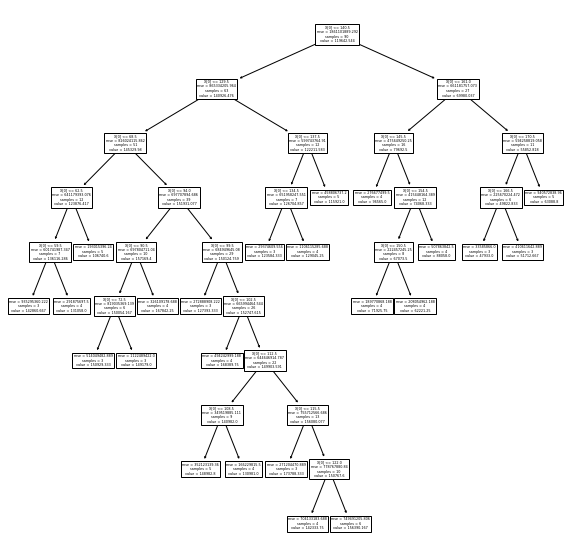

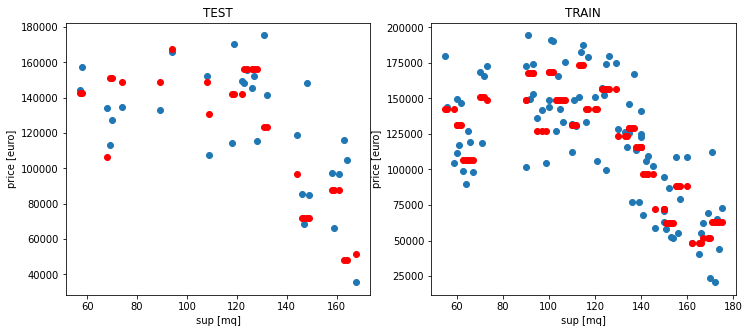

In [28]:
# import library
from sklearn import tree

#create an istance of DT regressor
#max_depth: max number of levels
#min_samples_leaf: ceil(min_samples_leaf * n_samples) are the minimum number of 
#samples for each node-> level of 'smoothing' of the model
#dtree = tree.DecisionTreeRegressor(max_depth=20, min_samples_leaf=0.07)
dtree = tree.DecisionTreeRegressor(max_depth=20, min_samples_leaf=0.03)

#train DT on traingin set
dtree.fit(X_train_r, y_train)

#y_pred_xxx is a prediction of X_xxx
y_pred_test=dtree.predict(X_test_r)
y_pred_train=dtree.predict(X_train_r)

#step 1 - COMPUTE AND SHOW R AND MSE
R2=dtree.score(X_test_r,y_test)
MSE = mean_squared_error(y_test,y_pred_test)
R2_train=dtree.score(X_train_r,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
print ('TEST\nR^2=',R2,'\nMSE= %f \n' % MSE)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)
################################################

#step 2 - PLOT THE TREE
plt.figure(figsize=(10,10))
tree.plot_tree(dtree)
plt.axis('off');
plt.show();
########################

#step 3 - PLOT THE 2 SUBPLOT WITH TEST AND TRAIN ESTIMATION
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,5)


axs[0].set_xlabel('sup [mq]')
axs[0].set_ylabel('price [euro]')
axs[0].set_title('TEST')
axs[0].scatter(X_test,y_test)
axs[0].scatter(X_test,y_pred_test,c='red',linewidth=1)

axs[1].set_title('TRAIN')
axs[1].set_xlabel('sup [mq]')
axs[1].set_ylabel('price [euro]')
axs[1].scatter(X_train,y_train)
axs[1].scatter(X_train,y_pred_train,c='red',linewidth=1)

plt.show();
################################################
